### Importing the Libraries

In [3]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM
from keras import models, layers
from keras_visualizer import visualizer
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

TOP_WORDS = 8000
MAX_WORDS = 500

### Loading the Dataset, applying Padding and Splitting the data

In [4]:
# load the dataset but only keep the top n words, zero the rest
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=TOP_WORDS)

# pad dataset to a maximum review length in words
X_train = sequence.pad_sequences(X_train, maxlen=MAX_WORDS)
X_test = sequence.pad_sequences(X_test, maxlen=MAX_WORDS)

X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # split into train and test sets.

17464789/17464789 [==============================] - 2s 0us/step


### Defining the Model Architecture

In [5]:
model = Sequential()
model.add(Embedding(TOP_WORDS, 100, input_length=MAX_WORDS))
model.add(LSTM(200))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          800000    
                                                                 
 lstm (LSTM)                 (None, 200)               240800    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 1041001 (3.97 MB)
Trainable params: 1041001 (3.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
visualizer(model, file_name="lstm", file_format="png", view=True)

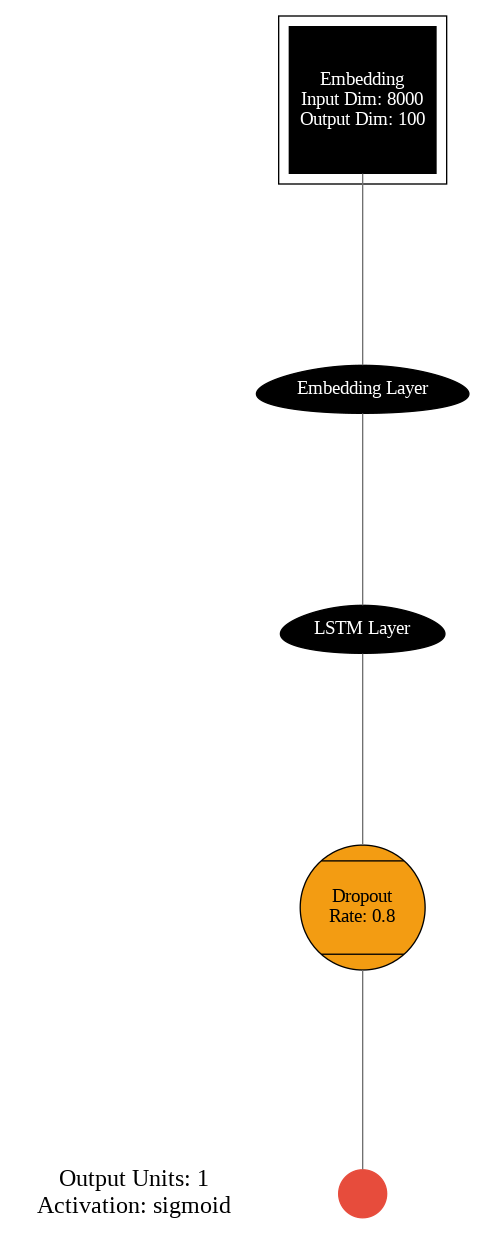

In [ ]:
img = Image.open("lstm.png")
display(img)

### Training the Model

In [ ]:
# fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=128, verbose=2)

# final evaluation of the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/3
219/219 - 47s - loss: 0.5102 - accuracy: 0.7327 - val_loss: 0.3245 - val_accuracy: 0.8651 - 47s/epoch - 216ms/step
Epoch 2/3
219/219 - 29s - loss: 0.2892 - accuracy: 0.8886 - val_loss: 0.3206 - val_accuracy: 0.8674 - 29s/epoch - 132ms/step
Epoch 3/3
219/219 - 23s - loss: 0.2296 - accuracy: 0.9155 - val_loss: 0.3128 - val_accuracy: 0.8750 - 23s/epoch - 105ms/step
469/469 [==============================] - 5s 11ms/step - loss: 0.2996 - accuracy: 0.8791
Test loss: 0.2995941936969757
Test accuracy: 0.8791333436965942


### Evaluating the Model

In [ ]:
pred = model.predict(X_test)
pred = [1 if x > 0.5 else 0 for x in pred]

469/469 [==============================] - 5s 9ms/step


##### Classification Report

In [ ]:
print('Classification Report:')
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      7398
           1       0.87      0.90      0.88      7602

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



##### Confusion Matrix

In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

Confusion Matrix:
[[6341 1057]
 [ 756 6846]]


In [ ]:
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
specificity = specificity_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')

Precision: 0.8662533215234721
Recall: 0.9005524861878453
F1 Score: 0.8830699774266366
Specificity: 0.8571235469045688
Accuracy: 0.8791333333333333


##### ROC Curve

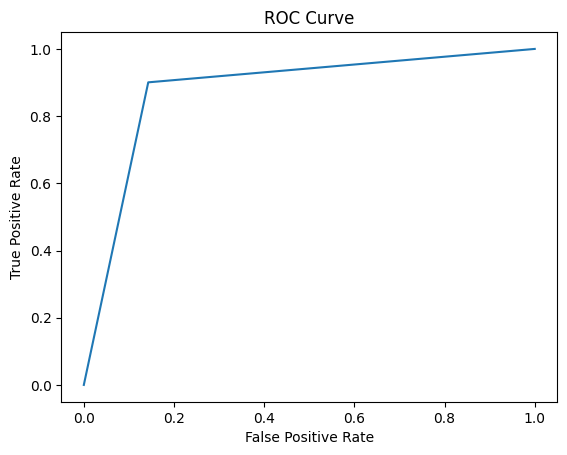

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Saving the Model

In [ ]:
model.save("lstm_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
